# Holiday Hackathon 2020

In [ ]:
# import nltk
# nltk.download('stopwords')

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import datetime
import nltk
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

# Loading in JSON line file

In [3]:
input_file = '/Users/lauraayala/Documents/H_HACKATHON-2020/DATA/Office_Products_5.json'

In [4]:
# Load JSON line file into object 
with open(input_file) as f:
    lines = f.read().splitlines()

In [5]:
# Load object into pandas DataFrame
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']

In [6]:
# Decode object into dictionary
import json
df_inter['json_element'].apply(json.loads)

0         {'overall': 4.0, 'verified': True, 'reviewTime...
1         {'overall': 4.0, 'verified': True, 'reviewTime...
2         {'overall': 5.0, 'verified': True, 'reviewTime...
3         {'overall': 5.0, 'verified': True, 'reviewTime...
4         {'overall': 5.0, 'verified': False, 'reviewTim...
                                ...                        
800352    {'overall': 5.0, 'verified': True, 'reviewTime...
800353    {'overall': 5.0, 'verified': True, 'reviewTime...
800354    {'overall': 5.0, 'verified': True, 'reviewTime...
800355    {'overall': 5.0, 'verified': True, 'reviewTime...
800356    {'overall': 4.0, 'verified': True, 'reviewTime...
Name: json_element, Length: 800357, dtype: object

In [7]:
# Normalize data into a flat table
df_final = pd.json_normalize(df_inter['json_element'].apply(json.loads))

In [8]:
df_final.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Format:,...,style.style:,style.Model:,style.Edition:,style.Model Number:,style.Shape:,style.Platform:,style.Material Type:,style.Material:,style.Flavor:,style.Gift Amount:
0,4.0,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,Board book,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,True,"03 7, 2017",A2827D8EEURMP4,0140503528,emankcin,Bought this used and it came in great conditio...,Good,1488844800,Hardcover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,True,"06 25, 2016",APB6087F4J09J,0140503528,Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,Board book,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,"02 21, 2016",A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,1456012800,Paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,False,"08 2, 2015",A2XCLJRGFANRC,0140503528,E. Ervin,Having spent numerous years in an elementary s...,Love Corduroy,1438473600,Hardcover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis & Data Cleaning

In [9]:
# df_final.info()

In [10]:
# df_final.describe()

In [11]:
# Reworking unixReviewTime column into new unixReviewTime column
from datetime import datetime

condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df_final["unixReviewTime"] = df_final["unixReviewTime"].apply(condition)

In [12]:
# Dropping reviewTime
df_final.drop(columns=['reviewTime'])

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Format:,vote,...,style.style:,style.Model:,style.Edition:,style.Model Number:,style.Shape:,style.Platform:,style.Material Type:,style.Material:,style.Flavor:,style.Gift Amount:
0,4.0,True,A2NIJTYWADLK57,0140503528,cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",11-06-2017,Board book,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,True,A2827D8EEURMP4,0140503528,emankcin,Bought this used and it came in great conditio...,Good,03-06-2017,Hardcover,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,True,APB6087F4J09J,0140503528,Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,06-24-2016,Board book,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,02-20-2016,Paperback,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,False,A2XCLJRGFANRC,0140503528,E. Ervin,Having spent numerous years in an elementary s...,Love Corduroy,08-01-2015,Hardcover,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800352,5.0,True,ACHG5QICJCS1F,B01HHLLLIO,Anky,Delivered on time and is as expected.,5 stars,09-08-2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800353,5.0,True,A1YB5J8SF6QX3L,B01HHLLLIO,DM,worked great.,good stuff,06-01-2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800354,5.0,True,A3N4O7L4HBYJX4,B01HHLLLIO,Verdant Treasures,I used to score free UPS 4x6 labels. The blac...,Couldn't be happier with these labels,04-28-2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800355,5.0,True,A2DR3CXSWWLYXY,B01HHLLLIO,C. F.,great,Five Stars,02-20-2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_final.shape

(800357, 41)

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800357 entries, 0 to 800356
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   overall                       800357 non-null  float64
 1   verified                      800357 non-null  bool   
 2   reviewTime                    800357 non-null  object 
 3   reviewerID                    800357 non-null  object 
 4   asin                          800357 non-null  object 
 5   reviewerName                  800217 non-null  object 
 6   reviewText                    800144 non-null  object 
 7   summary                       800228 non-null  object 
 8   unixReviewTime                800357 non-null  object 
 9   style.Format:                 11497 non-null   object 
 10  vote                          88817 non-null   object 
 11  style.Package Quantity:       19083 non-null   object 
 12  image                         11302 non-null

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800357 entries, 0 to 800356
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   overall                       800357 non-null  float64
 1   verified                      800357 non-null  bool   
 2   reviewTime                    800357 non-null  object 
 3   reviewerID                    800357 non-null  object 
 4   asin                          800357 non-null  object 
 5   reviewerName                  800217 non-null  object 
 6   reviewText                    800144 non-null  object 
 7   summary                       800228 non-null  object 
 8   unixReviewTime                800357 non-null  object 
 9   style.Format:                 11497 non-null   object 
 10  vote                          88817 non-null   object 
 11  style.Package Quantity:       19083 non-null   object 
 12  image                         11302 non-null

# Verified Purchase Reviews

Per Amazon: https://www.amazon.com/gp/help/customer/display.html?nodeId=202076110

"An 'Amazon Verified Purchase' review means we've verified that the person writing the review purchased the product at Amazon and didn't receive the product at a deep discount."

Not verified? Amazon either can't verify that the product was purchased on Amazon or the customer did not pay a price available to most Amazon shoppers. How many times can I use 'Amazon' in a sentence?

In short, Verified purchase reviews are made to speak to the wider Amazon consumer who pays the standard price for a product, removing any biases to their review via deep discounts.

In [16]:
# How many reviews are not verified? Are they worth including in our analyses?
df_final['verified'].value_counts()

True     710187
False     90170
Name: verified, dtype: int64

In [17]:
# Copy of df_final removing False rows under verified:
df_finalc = df_final[df_final.verified]
df_finalc

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Format:,...,style.style:,style.Model:,style.Edition:,style.Model Number:,style.Shape:,style.Platform:,style.Material Type:,style.Material:,style.Flavor:,style.Gift Amount:
0,4.0,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",11-06-2017,Board book,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,True,"03 7, 2017",A2827D8EEURMP4,0140503528,emankcin,Bought this used and it came in great conditio...,Good,03-06-2017,Hardcover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,True,"06 25, 2016",APB6087F4J09J,0140503528,Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,06-24-2016,Board book,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,"02 21, 2016",A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,02-20-2016,Paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,True,"01 1, 2015",A3JJTLTBCE7T7L,0140503528,Maestra Mam,Corduroy gets a pocket....riveting stuff people.,Five Stars,12-31-2014,Paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800352,5.0,True,"09 9, 2017",ACHG5QICJCS1F,B01HHLLLIO,Anky,Delivered on time and is as expected.,5 stars,09-08-2017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800353,5.0,True,"06 2, 2017",A1YB5J8SF6QX3L,B01HHLLLIO,DM,worked great.,good stuff,06-01-2017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800354,5.0,True,"04 29, 2017",A3N4O7L4HBYJX4,B01HHLLLIO,Verdant Treasures,I used to score free UPS 4x6 labels. The blac...,Couldn't be happier with these labels,04-28-2017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800355,5.0,True,"02 21, 2017",A2DR3CXSWWLYXY,B01HHLLLIO,C. F.,great,Five Stars,02-20-2017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_finalc = df_finalc[['unixReviewTime', 'overall', 'reviewerID', 'asin', 'reviewerName', 'summary', 'reviewText', 'vote', 'image']]
df_finalc

,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image
0,11-06-2017,4.0,A2NIJTYWADLK57,0140503528,cotton clay,"good story, small size book though",kids like story BUT while i really wanted a bo...,NaN,NaN
1,03-06-2017,4.0,A2827D8EEURMP4,0140503528,emankcin,Good,Bought this used and it came in great conditio...,NaN,NaN
2,06-24-2016,5.0,APB6087F4J09J,0140503528,Starbucks Fan,Best Books for All Children,Every story and book about Corduroy is Fantast...,NaN,NaN
3,02-20-2016,5.0,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,Great for Math!,I purchased this book for my first grade class...,NaN,NaN
5,12-31-2014,5.0,A3JJTLTBCE7T7L,0140503528,Maestra Mam,Five Stars,Corduroy gets a pocket....riveting stuff people.,NaN,NaN
...,...,...,...,...,...,...,...,...,...
800352,09-08-2017,5.0,ACHG5QICJCS1F,B01HHLLLIO,Anky,5 stars,Delivered on time and is as expected.,NaN,NaN
800353,06-01-2017,5.0,A1YB5J8SF6QX3L,B01HHLLLIO,DM,good stuff,worked great.,NaN,NaN
800354,04-28-2017,5.0,A3N4O7L4HBYJX4,B01HHLLLIO,Verdant Treasures,Couldn't be happier with these labels,I used to score free UPS 4x6 labels. The blac...,NaN,NaN
800355,02-20-2017,5.0,A2DR3CXSWWLYXY,B01HHLLLIO,C. F.,Five Stars,great,NaN,NaN


In [19]:
# Convert unixReviewTime to datetime format, ignore SettingWithCopyWarning
df_finalc['unixReviewTime'] = pd.to_datetime(df_finalc['unixReviewTime'])

<ipython-input-19-763b8cc0dc36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalc['unixReviewTime'] = pd.to_datetime(df_finalc['unixReviewTime'])


In [20]:
# Convert reviewText from object to string format

df_finalc['reviewText'] = df_finalc['reviewText'].astype(str)

<ipython-input-20-c56bbf9d6f92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalc['reviewText'] = df_finalc['reviewText'].astype(str)


In [21]:
# Convert summary from object to string format

df_finalc['summary'] = df_finalc['summary'].astype(str)

<ipython-input-21-6e712a84530f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalc['summary'] = df_finalc['summary'].astype(str)


In [22]:
# Confirm changes
df_finalc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710187 entries, 0 to 800356
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   unixReviewTime  710187 non-null  datetime64[ns]
 1   overall         710187 non-null  float64       
 2   reviewerID      710187 non-null  object        
 3   asin            710187 non-null  object        
 4   reviewerName    710080 non-null  object        
 5   summary         710187 non-null  object        
 6   reviewText      710187 non-null  object        
 7   vote            71617 non-null   object        
 8   image           8319 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 54.2+ MB


In [23]:
# Extract year from unixReviewTime for further analysis
df_finalc['year'] = df_finalc['unixReviewTime'].dt.year
df_finalc

<ipython-input-23-6c60cd54f714>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalc['year'] = df_finalc['unixReviewTime'].dt.year


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year
0,2017-11-06,4.0,A2NIJTYWADLK57,0140503528,cotton clay,"good story, small size book though",kids like story BUT while i really wanted a bo...,NaN,NaN,2017
1,2017-03-06,4.0,A2827D8EEURMP4,0140503528,emankcin,Good,Bought this used and it came in great conditio...,NaN,NaN,2017
2,2016-06-24,5.0,APB6087F4J09J,0140503528,Starbucks Fan,Best Books for All Children,Every story and book about Corduroy is Fantast...,NaN,NaN,2016
3,2016-02-20,5.0,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,Great for Math!,I purchased this book for my first grade class...,NaN,NaN,2016
5,2014-12-31,5.0,A3JJTLTBCE7T7L,0140503528,Maestra Mam,Five Stars,Corduroy gets a pocket....riveting stuff people.,NaN,NaN,2014
...,...,...,...,...,...,...,...,...,...,...
800352,2017-09-08,5.0,ACHG5QICJCS1F,B01HHLLLIO,Anky,5 stars,Delivered on time and is as expected.,NaN,NaN,2017
800353,2017-06-01,5.0,A1YB5J8SF6QX3L,B01HHLLLIO,DM,good stuff,worked great.,NaN,NaN,2017
800354,2017-04-28,5.0,A3N4O7L4HBYJX4,B01HHLLLIO,Verdant Treasures,Couldn't be happier with these labels,I used to score free UPS 4x6 labels. The blac...,NaN,NaN,2017
800355,2017-02-20,5.0,A2DR3CXSWWLYXY,B01HHLLLIO,C. F.,Five Stars,great,NaN,NaN,2017


In [24]:
df_finalc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710187 entries, 0 to 800356
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   unixReviewTime  710187 non-null  datetime64[ns]
 1   overall         710187 non-null  float64       
 2   reviewerID      710187 non-null  object        
 3   asin            710187 non-null  object        
 4   reviewerName    710080 non-null  object        
 5   summary         710187 non-null  object        
 6   reviewText      710187 non-null  object        
 7   vote            71617 non-null   object        
 8   image           8319 non-null    object        
 9   year            710187 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 59.6+ MB


In [25]:
# How many unique products are there? The answer is 27,630 unique items.
df_finalc['asin'].nunique()

27630

/Users/lauraayala/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


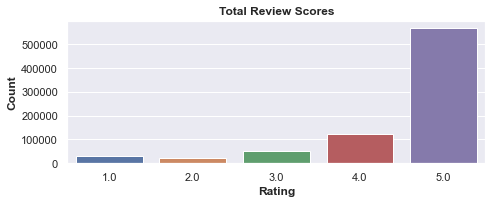

In [74]:
# Countplot of review scores

sns.set(rc={'figure.figsize': (7,3)})
sns.countplot(df_final.overall)
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Total Review Scores', fontweight='bold')
plt.tight_layout()
# plt.savefig('ratings_cntplot.png')

Text(0.5, 1.0, 'Average Product Review Score by Year')

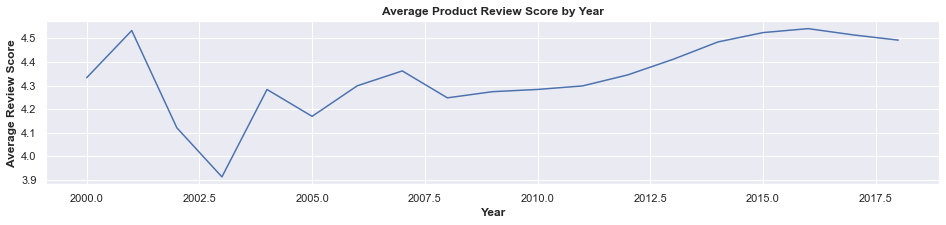

In [27]:
# Average review score over time? Have review scores increased (maybe feedback has helped a lot?)?

avg_score = df_finalc.groupby(['year'])['overall'].mean().reset_index()
avg_score

# Graph it. They seem really close.

sns.set(rc={'figure.figsize': (16,3)})
ax = sns.lineplot(x = 'year', y = 'overall', data = avg_score)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Review Score', fontweight='bold')
plt.title('Average Product Review Score by Year', fontweight='bold')

In [28]:
# Number of reviews over time? Do more people want their voices heard over time (increase in accessibility perhaps)?
count_revs = df_finalc.groupby(['year'])['asin'].count().reset_index()
count_revs

,year,asin
0,2000,15
1,2001,15
2,2002,33
3,2003,46
4,2004,67
5,2005,165
6,2006,321
7,2007,1027
8,2008,1862
9,2009,3253


Text(0.5, 1.0, 'Total Product Reviews By Year')

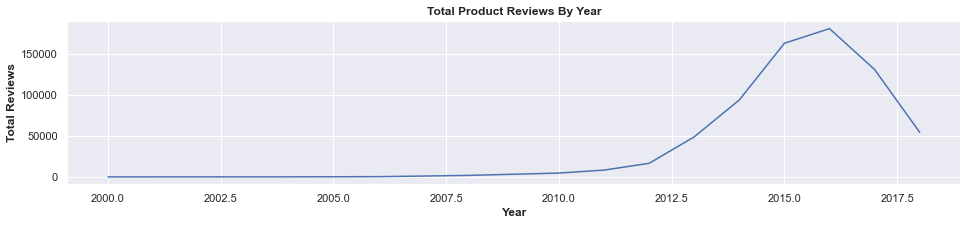

In [29]:
# Line graph reflecting counts of reviews over time
sns.set(rc={'figure.figsize': (16,3)})
ax = sns.lineplot(x = 'year', y = 'asin', data = count_revs)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Reviews', fontweight='bold')
plt.title('Total Product Reviews By Year', fontweight='bold')

In [30]:
# Number of unique product offerings by year
unique_yr = df_finalc.groupby('year')['asin'].nunique().reset_index()
unique_yr

,year,asin
0,2000,10
1,2001,15
2,2002,29
3,2003,35
4,2004,54
5,2005,99
6,2006,185
7,2007,461
8,2008,823
9,2009,1433


Text(0.5, 1.0, 'Unique Products Reviewed by Year')

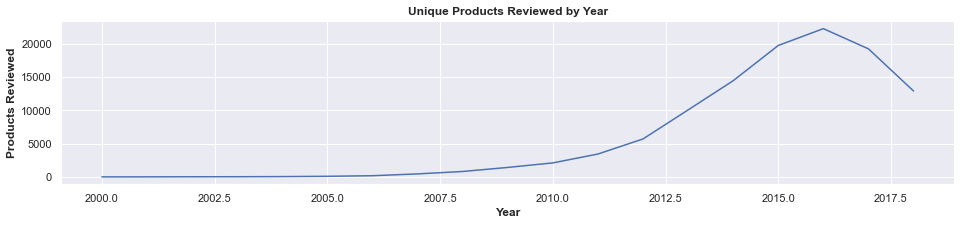

In [31]:
# Lineplot unique products by year

sns.set(rc={'figure.figsize': (16,3)})
ax = sns.lineplot(x = 'year', y = 'asin', data = unique_yr)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Products Reviewed', fontweight='bold')
plt.title('Unique Products Reviewed by Year', fontweight='bold')

In [32]:
# Which products had the most reviews? Least? (stick to three)
top_revs = df_finalc.groupby('asin')['reviewerID'].count().reset_index()
top_revs.sort_values('reviewerID', ascending=False)

,asin,reviewerID
6010,B0010JEJPC,2142
1361,B00006IEEV,2130
6628,B0015ASS3U,2050
5936,B000ZHB2HS,1861
15014,B00A89YZ6S,1774
...,...,...
15121,B00AHV7MIU,1
7157,B0017YN8EI,1
5939,B000ZHEVYO,1
7161,B0017YPH0Q,1


In [33]:
# Least reviews
low_revs = df_finalc.groupby('asin')['reviewerID'].count().reset_index()
low_revs.sort_values('reviewerID', ascending=True)

,asin,reviewerID
3584,B000E7LR8I,1
3839,B000FND8HO,1
6242,B0012VP26I,1
24319,B0153R9UDM,1
26703,B01E4AEOY4,1
...,...,...
15014,B00A89YZ6S,1774
5936,B000ZHB2HS,1861
6628,B0015ASS3U,2050
1361,B00006IEEV,2130


In [34]:
# Doesn't make sense to perform NLP on lowest reviewed, as most just have a single review.

In [35]:
# New dataframe reflecting 3 top reviewed items
new_df = df_finalc[(df_finalc['asin'] == 'B0010JEJPC') | (df_finalc['asin'] == 'B00006IEEV') | (df_finalc['asin'] == 'B0015ASS3U')]
new_df

,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year
53711,2018-05-14,5.0,A1O44FFI6QPRU2,B00006IEEV,M. Claeson,Five Stars,Great thanks!,NaN,NaN,2018
53766,2018-05-12,5.0,A2MUKNK3NNDQXJ,B00006IEEV,Jeanne A.,I love them!,I had not used Prismacolor before as they aren...,NaN,NaN,2018
53767,2018-05-11,5.0,AMKX54XQ6637V,B00006IEEV,RJG,Beautiful colors! Rich and deep,Beautiful colors! Rich and deep. The tips are ...,NaN,NaN,2018
53817,2018-05-08,5.0,AI1VKT4EGDAU0,B00006IEEV,Patricia,Amazing set for artists.,Amazing colored pencils. They are so soft and ...,NaN,NaN,2018
53843,2018-05-07,5.0,A2MO0GTIK8F9VQ,B00006IEEV,Melody Trotter,Best for price and quality,Lays down buttery smooth and blends well. I lo...,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...
746530,2018-05-16,5.0,A3PW4WQ3AKB51A,B00006IEEV,Amazon Customer,Five Stars,Recommend these coloring pencils.,NaN,NaN,2018
757282,2018-05-22,5.0,AJATVO0NB62UR,B0010JEJPC,Donique Oliveira,Five Stars,Love this laminator. So perfect and convenient.,NaN,NaN,2018
757283,2018-05-07,5.0,A1GOUJPVCY9XKO,B0010JEJPC,Wayne Brennan,Would buy again,Works great.\nnice size.,NaN,NaN,2018
758496,2018-05-18,4.0,A1OKPFMSFPT96C,B0015ASS3U,Richard T. Jensen,Four Stars,very pleased - great colors for projects,NaN,NaN,2018


In [61]:
# Which is the date range for this data set?

In [62]:
print (df_finalc.unixReviewTime.min())

2000-05-06 00:00:00


In [63]:
print (df_finalc.unixReviewTime.max())

2018-10-01 00:00:00


# Natural Language Processing

In [36]:
# It may be worth considering separate analyses on summary and review text

## Text length for each product (reviews)

In [37]:
# Function returns length of text for each review
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [38]:
# Apply function to new_df
new_df['length'] = new_df['reviewText'].apply(length)
new_df.head(10)

<ipython-input-38-d475a5a10db5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['length'] = new_df['reviewText'].apply(length)


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year,length
53711,2018-05-14,5.0,A1O44FFI6QPRU2,B00006IEEV,M. Claeson,Five Stars,Great thanks!,NaN,NaN,2018,13
53766,2018-05-12,5.0,A2MUKNK3NNDQXJ,B00006IEEV,Jeanne A.,I love them!,I had not used Prismacolor before as they aren...,NaN,NaN,2018,237
53767,2018-05-11,5.0,AMKX54XQ6637V,B00006IEEV,RJG,Beautiful colors! Rich and deep,Beautiful colors! Rich and deep. The tips are ...,NaN,NaN,2018,117
53817,2018-05-08,5.0,AI1VKT4EGDAU0,B00006IEEV,Patricia,Amazing set for artists.,Amazing colored pencils. They are so soft and ...,NaN,NaN,2018,197
53843,2018-05-07,5.0,A2MO0GTIK8F9VQ,B00006IEEV,Melody Trotter,Best for price and quality,Lays down buttery smooth and blends well. I lo...,NaN,NaN,2018,92
53901,2018-05-06,3.0,A2AMLMM0EACBLW,B00006IEEV,ARB,Disappointed. I love the way they go on but ...,Disappointed. I love the way they go on but th...,NaN,NaN,2018,616
54012,2018-05-01,5.0,A2751KNPYE4TV5,B00006IEEV,Acelene,Great,Good quality pencils. Now to learn how to use ...,NaN,NaN,2018,65
54039,2018-04-30,5.0,A1LVM4C4WQ6SRS,B00006IEEV,Johnel Logan,Love these. Buttery and smooth,Love these. Buttery and smooth. Nice colors,NaN,NaN,2018,44
54072,2018-04-29,4.0,A39R9GUBPVODKL,B00006IEEV,wayne 336,Four Stars,like it,NaN,NaN,2018,7
54127,2018-04-28,4.0,A2Z1N62W8YH606,B00006IEEV,Charlene,Four Stars,Loved them blend will,NaN,NaN,2018,21


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6322 entries, 53711 to 758497
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   unixReviewTime  6322 non-null   datetime64[ns]
 1   overall         6322 non-null   float64       
 2   reviewerID      6322 non-null   object        
 3   asin            6322 non-null   object        
 4   reviewerName    6321 non-null   object        
 5   summary         6322 non-null   object        
 6   reviewText      6322 non-null   object        
 7   vote            494 non-null    object        
 8   image           114 non-null    object        
 9   year            6322 non-null   int64         
 10  length          6322 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 592.7+ KB


In [40]:
# Extract data to perform even more specific NLP analyses
laminator_data = new_df[new_df['asin'] == 'B0010JEJPC']
prismacolor_data = new_df[new_df['asin'] == 'B00006IEEV']
sargent_data = new_df[new_df['asin'] == 'B0015ASS3U']

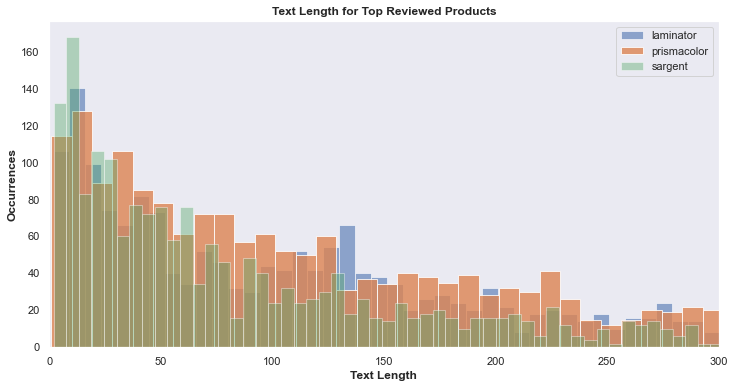

<Figure size 864x432 with 0 Axes>

In [79]:
# Histogram of text length for each item

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(laminator_data['length'], alpha = 0.6, bins=bins, label='laminator')
plt.hist(prismacolor_data['length'], alpha = 0.8, bins=bins, label='prismacolor')
plt.hist(sargent_data['length'], alpha = 0.4, bins=bins, label='sargent')
plt.xlabel('Text Length', fontweight='bold')
plt.ylabel('Occurrences', fontweight='bold')
plt.title('Text Length for Top Reviewed Products', fontweight='bold')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

plt.tight_layout()
# plt.savefig('prod_hist.png')

# Top words for each product and their count (reviewText, then summary)

In [42]:
# Remove stopwords & punctuation first before performing analyses

## Remove punctuation

In [43]:
# Function to remove punctuation

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [44]:
# Apply function to reviewText column

new_df['reviewText'] = new_df['reviewText'].apply(remove_punctuation)
new_df.head(10)

<ipython-input-44-1f3275a04516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['reviewText'] = new_df['reviewText'].apply(remove_punctuation)


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year,length
53711,2018-05-14,5.0,A1O44FFI6QPRU2,B00006IEEV,M. Claeson,Five Stars,Great thanks,NaN,NaN,2018,13
53766,2018-05-12,5.0,A2MUKNK3NNDQXJ,B00006IEEV,Jeanne A.,I love them!,I had not used Prismacolor before as they aren...,NaN,NaN,2018,237
53767,2018-05-11,5.0,AMKX54XQ6637V,B00006IEEV,RJG,Beautiful colors! Rich and deep,Beautiful colors Rich and deep The tips are sl...,NaN,NaN,2018,117
53817,2018-05-08,5.0,AI1VKT4EGDAU0,B00006IEEV,Patricia,Amazing set for artists.,Amazing colored pencils They are so soft and t...,NaN,NaN,2018,197
53843,2018-05-07,5.0,A2MO0GTIK8F9VQ,B00006IEEV,Melody Trotter,Best for price and quality,Lays down buttery smooth and blends well I lov...,NaN,NaN,2018,92
53901,2018-05-06,3.0,A2AMLMM0EACBLW,B00006IEEV,ARB,Disappointed. I love the way they go on but ...,Disappointed I love the way they go on but the...,NaN,NaN,2018,616
54012,2018-05-01,5.0,A2751KNPYE4TV5,B00006IEEV,Acelene,Great,Good quality pencils Now to learn how to use t...,NaN,NaN,2018,65
54039,2018-04-30,5.0,A1LVM4C4WQ6SRS,B00006IEEV,Johnel Logan,Love these. Buttery and smooth,Love these Buttery and smooth Nice colors,NaN,NaN,2018,44
54072,2018-04-29,4.0,A39R9GUBPVODKL,B00006IEEV,wayne 336,Four Stars,like it,NaN,NaN,2018,7
54127,2018-04-28,4.0,A2Z1N62W8YH606,B00006IEEV,Charlene,Four Stars,Loved them blend will,NaN,NaN,2018,21


## Extract stopwords

In [45]:
# Remove stopwords

# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [46]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [47]:
# Function to remove stopwords

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [48]:
# Apply function

laminator_data['summary'] = laminator_data['summary'].apply(stopwords)
laminator_data.head(10)

<ipython-input-48-11ae43a1efd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laminator_data['summary'] = laminator_data['summary'].apply(stopwords)


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year,length
222764,2018-04-24,5.0,A3CTXC2N7N28OF,B0010JEJPC,Amazon Customer,five stars,It works.,NaN,NaN,2018,9
222765,2018-04-18,5.0,A2PPD9QGFSHN20,B0010JEJPC,Troy,works great small projects around house ...,Works great for all those small projects aroun...,NaN,NaN,2018,169
222766,2018-04-02,5.0,A3A77TEPG6R30N,B0010JEJPC,stitchhappy,asset home office,Perfect for the small home office. A great pr...,NaN,NaN,2018,67
222767,2018-03-28,3.0,AJ68F5QP3GK5S,B0010JEJPC,Christina,okay,It works but it started making a rattling nois...,NaN,NaN,2018,192
222768,2018-03-27,5.0,ARXKP5YNOTHP6,B0010JEJPC,elsieonthelake,5 stars,I use this all the time..,NaN,NaN,2018,25
222769,2018-03-19,5.0,A3TP9J9XHZORA8,B0010JEJPC,Jamie N,five stars,So cheap and works like a professional machine...,NaN,NaN,2018,58
222770,2018-03-09,5.0,A2P4YA02LH6N12,B0010JEJPC,Mike Bornhoff,five stars,"Good product, fair price.",NaN,NaN,2018,25
222771,2018-02-26,5.0,A1SV3G103VI46D,B0010JEJPC,40dbOverS9,five stars,Works great!,NaN,NaN,2018,12
222772,2018-02-11,5.0,A1YGAEI5YQHLND,B0010JEJPC,Amazon Customer,five stars,A+,NaN,NaN,2018,2
222773,2018-01-21,5.0,A2NSJTAHADGVKA,B0010JEJPC,Alyssum_,five stars,Perfect for my needs as a teacher.,NaN,NaN,2018,34


In [49]:
prismacolor_data['summary'] = prismacolor_data['summary'].apply(stopwords)
prismacolor_data.head(10)

<ipython-input-49-311d8a6d9201>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prismacolor_data['summary'] = prismacolor_data['summary'].apply(stopwords)


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year,length
53711,2018-05-14,5.0,A1O44FFI6QPRU2,B00006IEEV,M. Claeson,five stars,Great thanks!,NaN,NaN,2018,13
53766,2018-05-12,5.0,A2MUKNK3NNDQXJ,B00006IEEV,Jeanne A.,love them!,I had not used Prismacolor before as they aren...,NaN,NaN,2018,237
53767,2018-05-11,5.0,AMKX54XQ6637V,B00006IEEV,RJG,beautiful colors! rich deep,Beautiful colors! Rich and deep. The tips are ...,NaN,NaN,2018,117
53817,2018-05-08,5.0,AI1VKT4EGDAU0,B00006IEEV,Patricia,amazing set artists.,Amazing colored pencils. They are so soft and ...,NaN,NaN,2018,197
53843,2018-05-07,5.0,A2MO0GTIK8F9VQ,B00006IEEV,Melody Trotter,best price quality,Lays down buttery smooth and blends well. I lo...,NaN,NaN,2018,92
53901,2018-05-06,3.0,A2AMLMM0EACBLW,B00006IEEV,ARB,disappointed. love way go ...,Disappointed. I love the way they go on but th...,NaN,NaN,2018,616
54012,2018-05-01,5.0,A2751KNPYE4TV5,B00006IEEV,Acelene,great,Good quality pencils. Now to learn how to use ...,NaN,NaN,2018,65
54039,2018-04-30,5.0,A1LVM4C4WQ6SRS,B00006IEEV,Johnel Logan,love these. buttery smooth,Love these. Buttery and smooth. Nice colors,NaN,NaN,2018,44
54072,2018-04-29,4.0,A39R9GUBPVODKL,B00006IEEV,wayne 336,four stars,like it,NaN,NaN,2018,7
54127,2018-04-28,4.0,A2Z1N62W8YH606,B00006IEEV,Charlene,four stars,Loved them blend will,NaN,NaN,2018,21


In [50]:
sargent_data['summary'] = sargent_data['summary'].apply(stopwords)
sargent_data.head(10)

<ipython-input-50-168c95c14ac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sargent_data['summary'] = sargent_data['summary'].apply(stopwords)


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year,length
239625,2013-04-01,5.0,A1FBYASE1JXULU,B0015ASS3U,kfireaway,pretty good,Not a bad product however I have used much bet...,NaN,NaN,2013,119
239626,2013-03-06,5.0,A2G10Y8S9G1K1V,B0015ASS3U,Cindi Hein,perfect sketch pencil,I purchased these pencils in the hope of doing...,5,NaN,2013,344
239627,2013-02-16,4.0,A7J4XWOGBHXQL,B0015ASS3U,Icebergtech,variety colors,"This is exactly what I was looking for, a var...",NaN,NaN,2013,103
239628,2013-02-09,3.0,A2VS4BHV52FPNV,B0015ASS3U,Debra Ringler,color lacking,The colors are not rich like Prang but they ar...,NaN,NaN,2013,122
239629,2013-02-08,5.0,A2S0JNPCRHN5D8,B0015ASS3U,Flo of Troy,nice colorful pencils.,I am enjoying these nice color pencils. they d...,NaN,NaN,2013,103
239630,2013-02-01,5.0,APT7V2Z8MO6T0,B0015ASS3U,AKVHutch,wonderful,I will admit up front that I am not an artist ...,NaN,NaN,2013,210
239631,2018-05-08,4.0,A3D5UX3NBB9N3J,B0015ASS3U,anon,four stars,Good item,NaN,NaN,2018,9
239632,2018-05-08,5.0,A30DJRROILPYNP,B0015ASS3U,Linda Martinez-Angeles,five stars,good,NaN,NaN,2018,4
239633,2018-04-20,5.0,A2956AC58RJPDF,B0015ASS3U,Chainland-The-Moose,great conditions work amazing,All 50 colors were in the box as described. In...,NaN,NaN,2018,81
239634,2018-04-13,5.0,A1RDWI6XVOFOMS,B0015ASS3U,Ruthie,wow deal!,This deal almost seemed too good to be true! G...,NaN,[https://images-na.ssl-images-amazon.com/image...,2018,95


In [51]:
# Removing stopwords from reviewText

In [52]:
laminator_data['reviewText'] = laminator_data['reviewText'].apply(stopwords)
laminator_data.head(10)

<ipython-input-52-30ee7689b4b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laminator_data['reviewText'] = laminator_data['reviewText'].apply(stopwords)


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year,length
222764,2018-04-24,5.0,A3CTXC2N7N28OF,B0010JEJPC,Amazon Customer,five stars,works.,NaN,NaN,2018,9
222765,2018-04-18,5.0,A2PPD9QGFSHN20,B0010JEJPC,Troy,works great small projects around house ...,works great small projects around house busine...,NaN,NaN,2018,169
222766,2018-04-02,5.0,A3A77TEPG6R30N,B0010JEJPC,stitchhappy,asset home office,perfect small home office. great price compact.,NaN,NaN,2018,67
222767,2018-03-28,3.0,AJ68F5QP3GK5S,B0010JEJPC,Christina,okay,works started making rattling noise using time...,NaN,NaN,2018,192
222768,2018-03-27,5.0,ARXKP5YNOTHP6,B0010JEJPC,elsieonthelake,5 stars,use time..,NaN,NaN,2018,25
222769,2018-03-19,5.0,A3TP9J9XHZORA8,B0010JEJPC,Jamie N,five stars,cheap works like professional machine. love it.,NaN,NaN,2018,58
222770,2018-03-09,5.0,A2P4YA02LH6N12,B0010JEJPC,Mike Bornhoff,five stars,"good product, fair price.",NaN,NaN,2018,25
222771,2018-02-26,5.0,A1SV3G103VI46D,B0010JEJPC,40dbOverS9,five stars,works great!,NaN,NaN,2018,12
222772,2018-02-11,5.0,A1YGAEI5YQHLND,B0010JEJPC,Amazon Customer,five stars,a+,NaN,NaN,2018,2
222773,2018-01-21,5.0,A2NSJTAHADGVKA,B0010JEJPC,Alyssum_,five stars,perfect needs teacher.,NaN,NaN,2018,34


In [53]:
prismacolor_data['reviewText'] = prismacolor_data['reviewText'].apply(stopwords)
prismacolor_data.head(10)

<ipython-input-53-b1dc8431c179>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prismacolor_data['reviewText'] = prismacolor_data['reviewText'].apply(stopwords)


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year,length
53711,2018-05-14,5.0,A1O44FFI6QPRU2,B00006IEEV,M. Claeson,five stars,great thanks!,NaN,NaN,2018,13
53766,2018-05-12,5.0,A2MUKNK3NNDQXJ,B00006IEEV,Jeanne A.,love them!,used prismacolor usually within budget receive...,NaN,NaN,2018,237
53767,2018-05-11,5.0,AMKX54XQ6637V,B00006IEEV,RJG,beautiful colors! rich deep,beautiful colors! rich deep. tips slightly sof...,NaN,NaN,2018,117
53817,2018-05-08,5.0,AI1VKT4EGDAU0,B00006IEEV,Patricia,amazing set artists.,amazing colored pencils. soft colors extremely...,NaN,NaN,2018,197
53843,2018-05-07,5.0,A2MO0GTIK8F9VQ,B00006IEEV,Melody Trotter,best price quality,lays buttery smooth blends well. love vibrant ...,NaN,NaN,2018,92
53901,2018-05-06,3.0,A2AMLMM0EACBLW,B00006IEEV,ARB,disappointed. love way go ...,disappointed. love way go tip breaks easily sh...,NaN,NaN,2018,616
54012,2018-05-01,5.0,A2751KNPYE4TV5,B00006IEEV,Acelene,great,good quality pencils. learn use effectively...,NaN,NaN,2018,65
54039,2018-04-30,5.0,A1LVM4C4WQ6SRS,B00006IEEV,Johnel Logan,love these. buttery smooth,love these. buttery smooth. nice colors,NaN,NaN,2018,44
54072,2018-04-29,4.0,A39R9GUBPVODKL,B00006IEEV,wayne 336,four stars,like,NaN,NaN,2018,7
54127,2018-04-28,4.0,A2Z1N62W8YH606,B00006IEEV,Charlene,four stars,loved blend,NaN,NaN,2018,21


In [54]:
sargent_data['reviewText'] = sargent_data['reviewText'].apply(stopwords)
sargent_data.head(10)

<ipython-input-54-772fc871dc02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sargent_data['reviewText'] = sargent_data['reviewText'].apply(stopwords)


,unixReviewTime,overall,reviewerID,asin,reviewerName,summary,reviewText,vote,image,year,length
239625,2013-04-01,5.0,A1FBYASE1JXULU,B0015ASS3U,kfireaway,pretty good,bad product however used much better colored p...,NaN,NaN,2013,119
239626,2013-03-06,5.0,A2G10Y8S9G1K1V,B0015ASS3U,Cindi Hein,perfect sketch pencil,purchased pencils hope sketching again. use ri...,5,NaN,2013,344
239627,2013-02-16,4.0,A7J4XWOGBHXQL,B0015ASS3U,Icebergtech,variety colors,"exactly looking for, variety different shades ...",NaN,NaN,2013,103
239628,2013-02-09,3.0,A2VS4BHV52FPNV,B0015ASS3U,Debra Ringler,color lacking,colors rich like prang ok. pencils par crayola...,NaN,NaN,2013,122
239629,2013-02-08,5.0,A2S0JNPCRHN5D8,B0015ASS3U,Flo of Troy,nice colorful pencils.,"enjoying nice color pencils. good job, fun use...",NaN,NaN,2013,103
239630,2013-02-01,5.0,APT7V2Z8MO6T0,B0015ASS3U,AKVHutch,wonderful,admit front artist enjoy drawing. every & want...,NaN,NaN,2013,210
239631,2018-05-08,4.0,A3D5UX3NBB9N3J,B0015ASS3U,anon,four stars,good item,NaN,NaN,2018,9
239632,2018-05-08,5.0,A30DJRROILPYNP,B0015ASS3U,Linda Martinez-Angeles,five stars,good,NaN,NaN,2018,4
239633,2018-04-20,5.0,A2956AC58RJPDF,B0015ASS3U,Chainland-The-Moose,great conditions work amazing,50 colors box described. great conditions work...,NaN,NaN,2018,81
239634,2018-04-13,5.0,A1RDWI6XVOFOMS,B0015ASS3U,Ruthie,wow deal!,"deal almost seemed good true! great quality, f...",NaN,[https://images-na.ssl-images-amazon.com/image...,2018,95


In [83]:
# Convert to csvs for Tableau
laminator_data.to_csv(r'/Users/lauraayala/Documents/H_HACKATHON-2020/DATA/laminator_data.csv', index = False)
prismacolor_data.to_csv(r'/Users/lauraayala/Documents/H_HACKATHON-2020/DATA/prismacolor_data.csv', index = False)
sargent_data.to_csv(r'/Users/lauraayala/Documents/H_HACKATHON-2020/DATA/sargent_data.csv', index = False)

## Scotch Thermal Laminator

/Users/lauraayala/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


<AxesSubplot:>

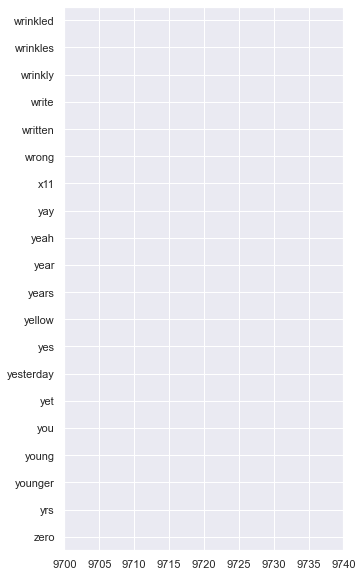

In [55]:
# create the object of tfid vectorizer
laminator_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
laminator_tfid_vectorizer.fit(laminator_data['reviewText'])
# collect the vocabulary items used in the vectorizer
laminator_dictionary = laminator_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in laminator_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in pandas dataframe with vocab as index
laminator_vocab = pd.Series(count, index=vocab)
# sort the dataframe
laminator_vocab = laminator_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = laminator_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9700, 9740))

<AxesSubplot:>

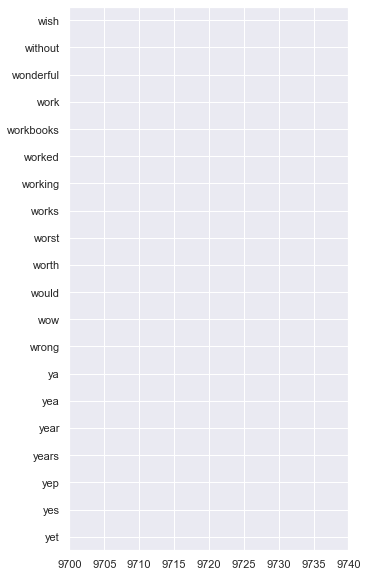

In [56]:
# create the object of tfid vectorizer
laminator_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
laminator_tfid_vectorizer.fit(laminator_data['summary'])
# collect the vocabulary items used in the vectorizer
laminator_dictionary = laminator_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in laminator_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in pandas dataframe with vocab as index
laminator_vocab = pd.Series(count, index=vocab)
# sort the dataframe
laminator_vocab = laminator_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = laminator_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9700, 9740))

## Prismacolor 3598T 48 Piece Prismacolor Colored Art Pencil Set

<AxesSubplot:>

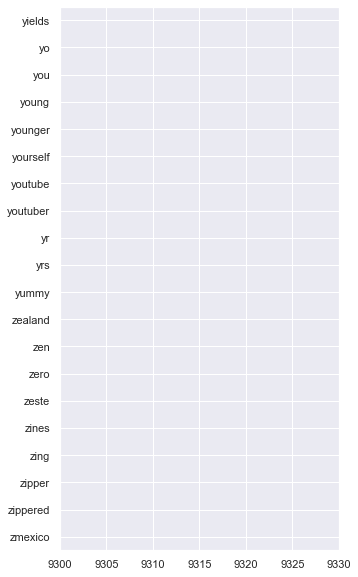

In [57]:
# create the object of tfid vectorizer
prismacolor_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
prismacolor_tfid_vectorizer.fit(prismacolor_data['reviewText'])
# collect the vocabulary items used in the vectorizer
prismacolor_dictionary = prismacolor_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in prismacolor_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index    
prismacolor_vocab = pd.Series(count, index=vocab)
# sort the dataframe
prismacolor_vocab = prismacolor_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = prismacolor_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9300, 9330))

<AxesSubplot:>

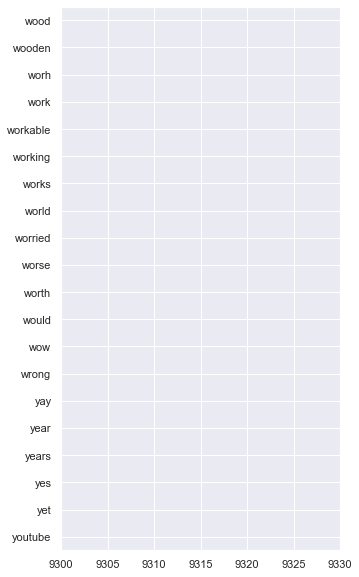

In [58]:
# create the object of tfid vectorizer
prismacolor_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
prismacolor_tfid_vectorizer.fit(prismacolor_data['summary'])
# collect the vocabulary items used in the vectorizer
prismacolor_dictionary = prismacolor_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in prismacolor_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index    
prismacolor_vocab = pd.Series(count, index=vocab)
# sort the dataframe
prismacolor_vocab = prismacolor_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = prismacolor_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9300, 9330))

## Sargent Art 22-7212 12-Count Assorted Colored Pencils

<AxesSubplot:>

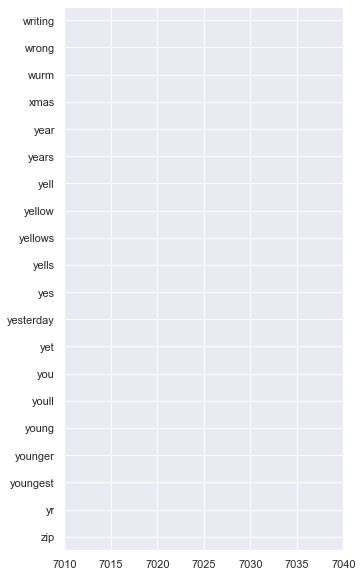

In [59]:
# create the object of tfid vectorizer
sargent_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
sargent_tfid_vectorizer.fit(sargent_data['reviewText'])
# collect the vocabulary items used in the vectorizer
sargent_dictionary = sargent_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated list
for key, value in sargent_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe and vocab as index    
sargent_vocab = pd.Series(count, index=vocab)
# sort the dataframe
sargent_vocab = sargent_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = sargent_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (7010, 7040))

<AxesSubplot:>

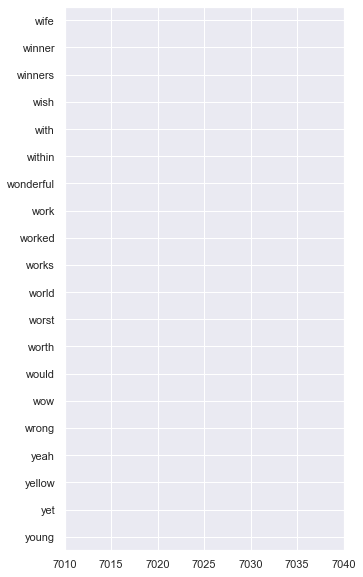

In [60]:
# create the object of tfid vectorizer
sargent_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
sargent_tfid_vectorizer.fit(sargent_data['summary'])
# collect the vocabulary items used in the vectorizer
sargent_dictionary = sargent_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated list
for key, value in sargent_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe and vocab as index    
sargent_vocab = pd.Series(count, index=vocab)
# sort the dataframe
sargent_vocab = sargent_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = sargent_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (7010, 7040))

In [64]:
# Maybe double line graph reflecting positive/negative reviews over time? May/may not be correlated.

In [65]:
# Word clouds for most frequently used words in positive and negative reviews for office supplies